In [1]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression

# Data

In [46]:
#All asset and portfolio price, returns 
df = pd.read_csv('df.csv',index_col=0) 
df

,XSP.TO_P,XSP.TO_R,XIU.TO_P,XIU.TO_R,XIN.TO_P,XIN.TO_R,XBB.TO_P,XBB.TO_R,XGB.TO_P,XGB.TO_R,XRB.TO_P,XRB.TO_R,XRE.TO_P,XRE.TO_R,Port_P,Port_R
formatted_date,,,,,,,,,,,,,,,,
2006-04-01,13.145290,NaN,11.521857,NaN,17.995522,NaN,16.917009,NaN,NaN,NaN,14.437650,NaN,6.142775,NaN,NaN,NaN
2006-05-01,12.707119,-0.033333,11.153104,-0.032005,16.989994,-0.055877,16.982298,0.003859,NaN,NaN,14.296542,-0.009774,6.151716,0.001456,NaN,NaN
2006-06-01,12.794751,0.006896,11.037451,-0.010370,17.191097,0.011837,16.697371,-0.016778,NaN,NaN,14.051461,-0.017143,6.120422,-0.005087,NaN,NaN
2006-07-01,12.810687,0.001246,11.291711,0.023036,17.232704,0.002420,17.248827,0.033027,NaN,NaN,14.674636,0.044349,6.482049,0.059085,NaN,NaN
2006-08-01,13.081561,0.021144,11.542490,0.022209,17.718132,0.028169,17.561024,0.018100,NaN,NaN,14.960310,0.019467,6.672697,0.029412,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-01,40.849056,0.027277,26.603354,0.036510,27.332333,0.027902,31.725668,-0.027332,22.031994,-0.031403,25.542923,-0.042799,16.469028,0.038749,120630.995336,0.006222
2021-03-01,42.650196,0.044093,28.012825,0.052981,28.717251,0.050670,31.317741,-0.012858,21.713200,-0.014470,25.324438,-0.008554,17.255177,0.047735,123727.171566,0.025667
2021-04-01,44.809574,0.050630,28.658510,0.023050,29.033804,0.011023,31.326403,0.000277,21.741892,0.001321,24.817949,-0.020000,18.062016,0.046759,130937.071944,0.018547


In [335]:
#Each Asset Returns
df_R = pd.read_csv('df_R.csv') 
df_R

,DATE,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R
0,2006-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2006-05-01,-0.033333,-0.032005,-0.055877,0.003859,NaN,-0.009774,0.001456
2,2006-06-01,0.006896,-0.010370,0.011837,-0.016778,NaN,-0.017143,-0.005087
3,2006-07-01,0.001246,0.023036,0.002420,0.033027,NaN,0.044349,0.059085
4,2006-08-01,0.021144,0.022209,0.028169,0.018100,NaN,0.019467,0.029412
...,...,...,...,...,...,...,...,...
178,2021-02-01,0.027277,0.036510,0.027902,-0.027332,-0.031403,-0.042799,0.038749
179,2021-03-01,0.044093,0.052981,0.050670,-0.012858,-0.014470,-0.008554,0.047735
180,2021-04-01,0.050630,0.023050,0.011023,0.000277,0.001321,-0.020000,0.046759
181,2021-05-01,0.004219,0.030849,0.022828,0.006002,0.005632,0.034414,0.026318


In [51]:
report_date = '2021-06-01'

# Historical Scenario

## Great Recession : 2007-07-12 ~ 2009-09-02

In [52]:
open_day='2007-07-12'
close_day='2009-09-02'
con1=df_R['date']>=open_day
con2=df_R['date']<=close_day
Great_recession=df_R[con1&con2]
Great_recession

,date,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R
16,2007-08-01,0.011475,-0.008830,-0.003507,0.009950,0.010775,-0.005420,0.020196
17,2007-09-01,0.032955,0.026850,0.016895,-0.004926,-0.003045,0.016894,0.019157
18,2007-10-01,0.014644,0.045350,0.029076,0.017006,0.016859,0.003752,-0.033252
19,2007-11-01,-0.046392,-0.053670,-0.045409,0.011959,0.017713,-0.003738,-0.031434
20,2007-12-01,-0.017838,0.005957,-0.038760,-0.002086,-0.003481,0.017149,-0.035836
21,2008-01-01,-0.050061,-0.040450,-0.085962,0.016032,0.015824,0.002308,-0.037990
22,2008-02-01,-0.030534,0.033592,-0.028688,0.012136,0.009926,0.023404,-0.002242
23,2008-03-01,-0.004240,-0.018750,-0.022363,-0.002399,0.006387,0.040541,-0.006742
24,2008-04-01,0.050487,0.064680,0.062150,0.005007,-0.000715,-0.018482,0.036814
25,2008-05-01,0.010423,0.064462,0.019098,-0.000346,0.000000,0.031552,0.024194


In [55]:
Great_recession.to_csv('recession.csv',encoding='utf-8',index=False)

In [56]:
Great_recession=pd.read_csv('recession.csv',index_col=0)
Great_recession

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R
date,,,,,,,
2007-08-01,0.011475,-0.008830,-0.003507,0.009950,0.010775,-0.005420,0.020196
2007-09-01,0.032955,0.026850,0.016895,-0.004926,-0.003045,0.016894,0.019157
2007-10-01,0.014644,0.045350,0.029076,0.017006,0.016859,0.003752,-0.033252
2007-11-01,-0.046392,-0.053670,-0.045409,0.011959,0.017713,-0.003738,-0.031434
2007-12-01,-0.017838,0.005957,-0.038760,-0.002086,-0.003481,0.017149,-0.035836
2008-01-01,-0.050061,-0.040450,-0.085962,0.016032,0.015824,0.002308,-0.037990
2008-02-01,-0.030534,0.033592,-0.028688,0.012136,0.009926,0.023404,-0.002242
2008-03-01,-0.004240,-0.018750,-0.022363,-0.002399,0.006387,0.040541,-0.006742
2008-04-01,0.050487,0.064680,0.062150,0.005007,-0.000715,-0.018482,0.036814


In [58]:
XSPTO_R=  df['XSP.TO_P'].iloc[-1] * Great_recession["XSP.TO_R"]
XSPTO_R = XSPTO_R.to_frame(name='XSP.TO_R')

XIUTO_R=  df['XIU.TO_P'].iloc[-1] * Great_recession["XIU.TO_R"]
XIUTO_R = XIUTO_R.to_frame(name='XIU.TO_R')

XINTO_R=  df['XIN.TO_P'].iloc[-1] * Great_recession["XIN.TO_R"]
XINTO_R = XINTO_R.to_frame(name='XIN.TO_R')

XBBTO_R=  df['XBB.TO_P'].iloc[-1] * Great_recession["XBB.TO_R"]
XBBTO_R = XBBTO_R.to_frame(name='XBB.TO_R')

XGBTO_R=  df['XGB.TO_P'].iloc[-1] * Great_recession["XGB.TO_R"]
XGBTO_R = XGBTO_R.to_frame(name='XGB.TO_R')

XRBTO_R=  df['XRB.TO_P'].iloc[-1] * Great_recession["XRB.TO_R"]
XRBTO_R = XRBTO_R.to_frame(name='XRB.TO_R')

XRETO_R=  df['XRE.TO_P'].iloc[-1] * Great_recession["XRE.TO_R"]
XRETO_R = XRETO_R.to_frame(name='XRE.TO_R')

In [61]:
Great_recession = XSPTO_R.merge(XIUTO_R, on='date').merge(XINTO_R, on='date').merge(XBBTO_R, on='date').merge(XGBTO_R, on='date').merge(XRBTO_R, on='date').merge(XRETO_R, on='date')
Great_recession

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R
date,,,,,,,
2007-08-01,0.527337,-0.269571,-0.104295,0.316927,0.238412,-0.140499,0.387029
2007-09-01,1.514423,0.819744,0.502398,-0.156918,-0.067381,0.437889,0.367115
2007-10-01,0.672969,1.384551,0.864607,0.541677,0.373031,0.097249,-0.637220
2007-11-01,-2.131878,-1.638552,-1.350276,0.380932,0.391938,-0.096885,-0.602373
2007-12-01,-0.819716,0.181865,-1.152567,-0.066429,-0.077019,0.444517,-0.686732
2008-01-01,-2.300520,-1.234941,-2.556188,0.510659,0.350134,0.059826,-0.728018
2008-02-01,-1.403173,1.025565,-0.853081,0.386563,0.219636,0.606644,-0.042962
2008-03-01,-0.194836,-0.572441,-0.664990,-0.076399,0.141325,1.050827,-0.129201
2008-04-01,2.320057,1.974688,1.848094,0.159481,-0.015819,-0.479053,0.705478


In [62]:
Great_recession["Portfolio"] = Great_recession.sum(axis=1)
Great_recession

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R,Portfolio
date,,,,,,,,
2007-08-01,0.527337,-0.269571,-0.104295,0.316927,0.238412,-0.140499,0.387029,0.955339
2007-09-01,1.514423,0.819744,0.502398,-0.156918,-0.067381,0.437889,0.367115,3.417269
2007-10-01,0.672969,1.384551,0.864607,0.541677,0.373031,0.097249,-0.637220,3.296863
2007-11-01,-2.131878,-1.638552,-1.350276,0.380932,0.391938,-0.096885,-0.602373,-5.047093
2007-12-01,-0.819716,0.181865,-1.152567,-0.066429,-0.077019,0.444517,-0.686732,-2.176080
2008-01-01,-2.300520,-1.234941,-2.556188,0.510659,0.350134,0.059826,-0.728018,-5.899048
2008-02-01,-1.403173,1.025565,-0.853081,0.386563,0.219636,0.606644,-0.042962,-0.060807
2008-03-01,-0.194836,-0.572441,-0.664990,-0.076399,0.141325,1.050827,-0.129201,-0.445716
2008-04-01,2.320057,1.974688,1.848094,0.159481,-0.015819,-0.479053,0.705478,6.512926


In [63]:
#Use the portfolio value at 2007-08-01 add the portfolio value at 2021-06-01 which is 135705.400744

Great_recession.iloc[0,7]= 0.955339 + 135705.400744
Great_recession

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R,Portfolio
date,,,,,,,,
2007-08-01,0.527337,-0.269571,-0.104295,0.316927,0.238412,-0.140499,0.387029,135706.356083
2007-09-01,1.514423,0.819744,0.502398,-0.156918,-0.067381,0.437889,0.367115,3.417269
2007-10-01,0.672969,1.384551,0.864607,0.541677,0.373031,0.097249,-0.637220,3.296863
2007-11-01,-2.131878,-1.638552,-1.350276,0.380932,0.391938,-0.096885,-0.602373,-5.047093
2007-12-01,-0.819716,0.181865,-1.152567,-0.066429,-0.077019,0.444517,-0.686732,-2.176080
2008-01-01,-2.300520,-1.234941,-2.556188,0.510659,0.350134,0.059826,-0.728018,-5.899048
2008-02-01,-1.403173,1.025565,-0.853081,0.386563,0.219636,0.606644,-0.042962,-0.060807
2008-03-01,-0.194836,-0.572441,-0.664990,-0.076399,0.141325,1.050827,-0.129201,-0.445716
2008-04-01,2.320057,1.974688,1.848094,0.159481,-0.015819,-0.479053,0.705478,6.512926


In [64]:
Great_recession['Portfolio'] = np.cumsum(Great_recession['Portfolio'])
Great_recession

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R,Portfolio
date,,,,,,,,
2007-08-01,0.527337,-0.269571,-0.104295,0.316927,0.238412,-0.140499,0.387029,135706.356083
2007-09-01,1.514423,0.819744,0.502398,-0.156918,-0.067381,0.437889,0.367115,135709.773352
2007-10-01,0.672969,1.384551,0.864607,0.541677,0.373031,0.097249,-0.637220,135713.070215
2007-11-01,-2.131878,-1.638552,-1.350276,0.380932,0.391938,-0.096885,-0.602373,135708.023122
2007-12-01,-0.819716,0.181865,-1.152567,-0.066429,-0.077019,0.444517,-0.686732,135705.847042
2008-01-01,-2.300520,-1.234941,-2.556188,0.510659,0.350134,0.059826,-0.728018,135699.947994
2008-02-01,-1.403173,1.025565,-0.853081,0.386563,0.219636,0.606644,-0.042962,135699.887187
2008-03-01,-0.194836,-0.572441,-0.664990,-0.076399,0.141325,1.050827,-0.129201,135699.441471
2008-04-01,2.320057,1.974688,1.848094,0.159481,-0.015819,-0.479053,0.705478,135705.954397


In [66]:
Great_recession.to_csv('great_recession.csv')

Text(0, 0.5, 'Portfolio Value')

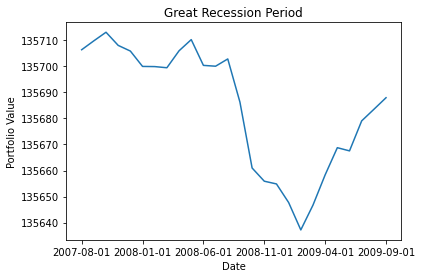

In [332]:
Great_recession["Portfolio"].plot()
plt.title('Great Recession Period')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')

## Covid-19 Period: 2020-01-23 ~ 2021-06-21

In [67]:
open_day='2020-01-23'
close_day='2021-06-21'
con1=df_R['date']>=open_day
con2=df_R['date']<=close_day
covid19=df_R[con1&con2]
covid19

,date,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R
166,2020-02-01,-0.080473,-0.061350,-0.071322,0.005312,0.007174,0.012002,-0.034979
167,2020-03-01,-0.136475,-0.150315,-0.141200,-0.033476,-0.005633,-0.076894,-0.272430
168,2020-04-01,0.124026,0.092978,0.055892,0.052750,0.032464,0.051803,0.061883
169,2020-05-01,0.048235,0.019052,0.052051,0.003723,0.001387,0.013002,-0.022028
170,2020-06-01,0.012030,0.033311,0.014675,0.017953,0.013425,0.016336,0.030267
171,2020-07-01,0.064593,0.041189,-0.010238,0.014390,0.011574,0.057263,0.012595
172,2020-08-01,0.065823,0.014682,0.037553,-0.014118,-0.015537,-0.008029,-0.018741
173,2020-09-01,-0.039588,-0.012715,-0.008133,0.003909,0.004744,0.001472,-0.008430
174,2020-10-01,-0.024732,-0.034865,-0.034850,-0.008661,-0.008086,-0.005143,-0.023549
175,2020-11-01,0.105663,0.097748,0.121070,0.011783,0.006898,0.017356,0.172612


In [70]:
covid19.to_csv('covid19.csv',encoding='utf-8',index=False)

In [71]:
covid19=pd.read_csv('covid19.csv',index_col=0)
covid19

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R
date,,,,,,,
2020-02-01,-0.080473,-0.061350,-0.071322,0.005312,0.007174,0.012002,-0.034979
2020-03-01,-0.136475,-0.150315,-0.141200,-0.033476,-0.005633,-0.076894,-0.272430
2020-04-01,0.124026,0.092978,0.055892,0.052750,0.032464,0.051803,0.061883
2020-05-01,0.048235,0.019052,0.052051,0.003723,0.001387,0.013002,-0.022028
2020-06-01,0.012030,0.033311,0.014675,0.017953,0.013425,0.016336,0.030267
2020-07-01,0.064593,0.041189,-0.010238,0.014390,0.011574,0.057263,0.012595
2020-08-01,0.065823,0.014682,0.037553,-0.014118,-0.015537,-0.008029,-0.018741
2020-09-01,-0.039588,-0.012715,-0.008133,0.003909,0.004744,0.001472,-0.008430
2020-10-01,-0.024732,-0.034865,-0.034850,-0.008661,-0.008086,-0.005143,-0.023549


In [72]:
XSPTO_R=  df['XSP.TO_P'].iloc[-1] * covid19["XSP.TO_R"]
XSPTO_R = XSPTO_R.to_frame(name='XSP.TO_R')

XIUTO_R=  df['XIU.TO_P'].iloc[-1] * covid19["XIU.TO_R"]
XIUTO_R = XIUTO_R.to_frame(name='XIU.TO_R')

XINTO_R=  df['XIN.TO_P'].iloc[-1] * covid19["XIN.TO_R"]
XINTO_R = XINTO_R.to_frame(name='XIN.TO_R')

XBBTO_R=  df['XBB.TO_P'].iloc[-1] * covid19["XBB.TO_R"]
XBBTO_R = XBBTO_R.to_frame(name='XBB.TO_R')

XGBTO_R=  df['XGB.TO_P'].iloc[-1] * covid19["XGB.TO_R"]
XGBTO_R = XGBTO_R.to_frame(name='XGB.TO_R')

XRBTO_R=  df['XRB.TO_P'].iloc[-1] * covid19["XRB.TO_R"]
XRBTO_R = XRBTO_R.to_frame(name='XRB.TO_R')

XRETO_R=  df['XRE.TO_P'].iloc[-1] * covid19["XRE.TO_R"]
XRETO_R = XRETO_R.to_frame(name='XRE.TO_R')

In [73]:
covid19 = XSPTO_R.merge(XIUTO_R, on='date').merge(XINTO_R, on='date').merge(XBBTO_R, on='date').merge(XGBTO_R, on='date').merge(XRBTO_R, on='date').merge(XRETO_R, on='date')
covid19

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R
date,,,,,,,
2020-02-01,-3.698041,-1.873008,-2.120852,0.169184,0.158738,0.311084,-0.670321
2020-03-01,-6.271565,-4.589115,-4.198747,-1.066292,-0.124649,-1.993106,-5.220678
2020-04-01,5.699461,2.838621,1.662015,1.680186,0.718323,1.342742,1.185895
2020-05-01,2.216573,0.581653,1.547801,0.118571,0.030696,0.337028,-0.422132
2020-06-01,0.552825,1.016980,0.436379,0.571846,0.297064,0.423434,0.580018
2020-07-01,2.968301,1.257501,-0.304450,0.458357,0.256106,1.484263,0.241354
2020-08-01,3.024817,0.448239,1.116674,-0.449694,-0.343796,-0.208117,-0.359134
2020-09-01,-1.819236,-0.388196,-0.241857,0.124523,0.104978,0.038144,-0.161556
2020-10-01,-1.136534,-1.064418,-1.036312,-0.275865,-0.178925,-0.133316,-0.451285


In [74]:
covid19["Portfolio"] = covid19.sum(axis=1)
covid19

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R,Portfolio
date,,,,,,,,
2020-02-01,-3.698041,-1.873008,-2.120852,0.169184,0.158738,0.311084,-0.670321,-7.723216
2020-03-01,-6.271565,-4.589115,-4.198747,-1.066292,-0.124649,-1.993106,-5.220678,-23.464152
2020-04-01,5.699461,2.838621,1.662015,1.680186,0.718323,1.342742,1.185895,15.127243
2020-05-01,2.216573,0.581653,1.547801,0.118571,0.030696,0.337028,-0.422132,4.410189
2020-06-01,0.552825,1.016980,0.436379,0.571846,0.297064,0.423434,0.580018,3.878547
2020-07-01,2.968301,1.257501,-0.304450,0.458357,0.256106,1.484263,0.241354,6.361433
2020-08-01,3.024817,0.448239,1.116674,-0.449694,-0.343796,-0.208117,-0.359134,3.228989
2020-09-01,-1.819236,-0.388196,-0.241857,0.124523,0.104978,0.038144,-0.161556,-2.343200
2020-10-01,-1.136534,-1.064418,-1.036312,-0.275865,-0.178925,-0.133316,-0.451285,-4.276655


In [75]:
covid19.iloc[0,7]= -7.723216 + 135705.400744
covid19

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R,Portfolio
date,,,,,,,,
2020-02-01,-3.698041,-1.873008,-2.120852,0.169184,0.158738,0.311084,-0.670321,135697.677528
2020-03-01,-6.271565,-4.589115,-4.198747,-1.066292,-0.124649,-1.993106,-5.220678,-23.464152
2020-04-01,5.699461,2.838621,1.662015,1.680186,0.718323,1.342742,1.185895,15.127243
2020-05-01,2.216573,0.581653,1.547801,0.118571,0.030696,0.337028,-0.422132,4.410189
2020-06-01,0.552825,1.016980,0.436379,0.571846,0.297064,0.423434,0.580018,3.878547
2020-07-01,2.968301,1.257501,-0.304450,0.458357,0.256106,1.484263,0.241354,6.361433
2020-08-01,3.024817,0.448239,1.116674,-0.449694,-0.343796,-0.208117,-0.359134,3.228989
2020-09-01,-1.819236,-0.388196,-0.241857,0.124523,0.104978,0.038144,-0.161556,-2.343200
2020-10-01,-1.136534,-1.064418,-1.036312,-0.275865,-0.178925,-0.133316,-0.451285,-4.276655


In [76]:
covid19['Portfolio'] = np.cumsum(covid19['Portfolio'])
covid19

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R,Portfolio
date,,,,,,,,
2020-02-01,-3.698041,-1.873008,-2.120852,0.169184,0.158738,0.311084,-0.670321,135697.677528
2020-03-01,-6.271565,-4.589115,-4.198747,-1.066292,-0.124649,-1.993106,-5.220678,135674.213376
2020-04-01,5.699461,2.838621,1.662015,1.680186,0.718323,1.342742,1.185895,135689.340619
2020-05-01,2.216573,0.581653,1.547801,0.118571,0.030696,0.337028,-0.422132,135693.750808
2020-06-01,0.552825,1.016980,0.436379,0.571846,0.297064,0.423434,0.580018,135697.629355
2020-07-01,2.968301,1.257501,-0.304450,0.458357,0.256106,1.484263,0.241354,135703.990788
2020-08-01,3.024817,0.448239,1.116674,-0.449694,-0.343796,-0.208117,-0.359134,135707.219777
2020-09-01,-1.819236,-0.388196,-0.241857,0.124523,0.104978,0.038144,-0.161556,135704.876577
2020-10-01,-1.136534,-1.064418,-1.036312,-0.275865,-0.178925,-0.133316,-0.451285,135700.599921


In [77]:
covid19.to_csv('covid19.csv')

Text(0, 0.5, 'Portfolio Value')

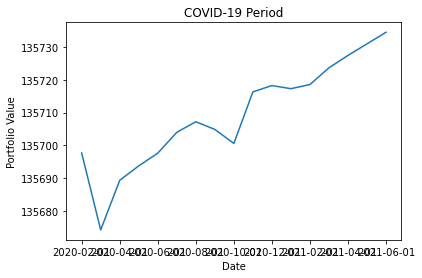

In [333]:
covid19["Portfolio"].plot()
plt.title('COVID-19 Period')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')

## 2015-2016 Growth Scare: 2015-06-22 ~ 2016-01-18 

In [337]:
open_day='2015-06-22'
close_day='2016-01-18'
con1=df_R['DATE']>=open_day
con2=df_R['DATE']<=close_day
growth_scare=df_R[con1&con2]
growth_scare

,DATE,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R
111,2015-07-01,0.032855,0.016215,0.053342,0.017291,0.013946,0.026642,0.005533
112,2015-08-01,-0.062423,-0.045581,-0.080418,-0.012011,-0.008945,-0.032051,-0.054291
113,2015-09-01,-0.026719,-0.038987,-0.042414,-0.002418,-0.005602,0.000828,0.017110
114,2015-10-01,0.082358,0.022659,0.068036,-0.003053,-0.001053,-0.019024,0.007168
115,2015-11-01,0.004574,-0.001499,0.017529,0.001108,-0.001108,0.008853,-0.010731
116,2015-12-01,-0.029801,-0.038038,-0.045378,0.011656,0.012662,0.013373,-0.034124
117,2016-01-01,-0.042112,-0.008059,-0.034896,0.002059,0.005715,0.002320,0.007495


In [338]:
growth_scare.to_csv('growth_scare.csv',encoding='utf-8',index=False)

In [339]:
growth_scare=pd.read_csv('growth_scare.csv',index_col=0)
growth_scare

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R
DATE,,,,,,,
2015-07-01,0.032855,0.016215,0.053342,0.017291,0.013946,0.026642,0.005533
2015-08-01,-0.062423,-0.045581,-0.080418,-0.012011,-0.008945,-0.032051,-0.054291
2015-09-01,-0.026719,-0.038987,-0.042414,-0.002418,-0.005602,0.000828,0.017110
2015-10-01,0.082358,0.022659,0.068036,-0.003053,-0.001053,-0.019024,0.007168
2015-11-01,0.004574,-0.001499,0.017529,0.001108,-0.001108,0.008853,-0.010731
2015-12-01,-0.029801,-0.038038,-0.045378,0.011656,0.012662,0.013373,-0.034124
2016-01-01,-0.042112,-0.008059,-0.034896,0.002059,0.005715,0.002320,0.007495


In [340]:
XSPTO_R=  df['XSP.TO_P'].iloc[-1] * growth_scare["XSP.TO_R"]
XSPTO_R = XSPTO_R.to_frame(name='XSP.TO_R')

XIUTO_R=  df['XIU.TO_P'].iloc[-1] * growth_scare["XIU.TO_R"]
XIUTO_R = XIUTO_R.to_frame(name='XIU.TO_R')

XINTO_R=  df['XIN.TO_P'].iloc[-1] * growth_scare["XIN.TO_R"]
XINTO_R = XINTO_R.to_frame(name='XIN.TO_R')

XBBTO_R=  df['XBB.TO_P'].iloc[-1] * growth_scare["XBB.TO_R"]
XBBTO_R = XBBTO_R.to_frame(name='XBB.TO_R')

XGBTO_R=  df['XGB.TO_P'].iloc[-1] * growth_scare["XGB.TO_R"]
XGBTO_R = XGBTO_R.to_frame(name='XGB.TO_R')

XRBTO_R=  df['XRB.TO_P'].iloc[-1] * growth_scare["XRB.TO_R"]
XRBTO_R = XRBTO_R.to_frame(name='XRB.TO_R')

XRETO_R=  df['XRE.TO_P'].iloc[-1] * growth_scare["XRE.TO_R"]
XRETO_R = XRETO_R.to_frame(name='XRE.TO_R')

In [341]:
#growth_scare = XSPTO_R.merge(XIUTO_R, on='date').merge(XINTO_R, on='date').merge(XBBTO_R, on='date').merge(XGBTO_R, on='date').merge(XRBTO_R, on='date').merge(XRETO_R, on='date')
#growth_scare

KeyError: 'date'

In [343]:
growth_scare = XSPTO_R.merge(XIUTO_R, left_index=True, right_index=True).merge(XINTO_R, left_index=True, right_index=True).merge(XBBTO_R, left_index=True, right_index=True).merge(XGBTO_R, left_index=True, right_index=True).merge(XRBTO_R, left_index=True, right_index=True).merge(XRETO_R, left_index=True, right_index=True)
growth_scare

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R
DATE,,,,,,,
2015-07-01,1.509828,0.495036,1.586197,0.550752,0.308590,0.690560,0.106033
2015-08-01,-2.868586,-1.391596,-2.391329,-0.382579,-0.197936,-0.830781,-1.040403
2015-09-01,-1.227866,-1.190261,-1.261220,-0.077012,-0.123954,0.021457,0.327889
2015-10-01,3.784692,0.691781,2.023143,-0.097229,-0.023296,-0.493103,0.137354
2015-11-01,0.210189,-0.045779,0.521244,0.035295,-0.024522,0.229478,-0.205641
2015-12-01,-1.369496,-1.161295,-1.349375,0.371271,0.280172,0.346620,-0.653928
2016-01-01,-1.935232,-0.246056,-1.037664,0.065587,0.126464,0.060145,0.143636


In [344]:
growth_scare["Portfolio"] = growth_scare.sum(axis=1)
growth_scare

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R,Portfolio
DATE,,,,,,,,
2015-07-01,1.509828,0.495036,1.586197,0.550752,0.308590,0.690560,0.106033,5.246995
2015-08-01,-2.868586,-1.391596,-2.391329,-0.382579,-0.197936,-0.830781,-1.040403,-9.103210
2015-09-01,-1.227866,-1.190261,-1.261220,-0.077012,-0.123954,0.021457,0.327889,-3.530967
2015-10-01,3.784692,0.691781,2.023143,-0.097229,-0.023296,-0.493103,0.137354,6.023343
2015-11-01,0.210189,-0.045779,0.521244,0.035295,-0.024522,0.229478,-0.205641,0.720264
2015-12-01,-1.369496,-1.161295,-1.349375,0.371271,0.280172,0.346620,-0.653928,-3.536032
2016-01-01,-1.935232,-0.246056,-1.037664,0.065587,0.126464,0.060145,0.143636,-2.823119


In [345]:
growth_scare.iloc[0,7]= 5.246995 + 135705.400744
growth_scare

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R,Portfolio
DATE,,,,,,,,
2015-07-01,1.509828,0.495036,1.586197,0.550752,0.308590,0.690560,0.106033,135710.647739
2015-08-01,-2.868586,-1.391596,-2.391329,-0.382579,-0.197936,-0.830781,-1.040403,-9.103210
2015-09-01,-1.227866,-1.190261,-1.261220,-0.077012,-0.123954,0.021457,0.327889,-3.530967
2015-10-01,3.784692,0.691781,2.023143,-0.097229,-0.023296,-0.493103,0.137354,6.023343
2015-11-01,0.210189,-0.045779,0.521244,0.035295,-0.024522,0.229478,-0.205641,0.720264
2015-12-01,-1.369496,-1.161295,-1.349375,0.371271,0.280172,0.346620,-0.653928,-3.536032
2016-01-01,-1.935232,-0.246056,-1.037664,0.065587,0.126464,0.060145,0.143636,-2.823119


In [346]:
growth_scare['Portfolio'] = np.cumsum(growth_scare['Portfolio'])
growth_scare

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R,Portfolio
DATE,,,,,,,,
2015-07-01,1.509828,0.495036,1.586197,0.550752,0.308590,0.690560,0.106033,135710.647739
2015-08-01,-2.868586,-1.391596,-2.391329,-0.382579,-0.197936,-0.830781,-1.040403,135701.544529
2015-09-01,-1.227866,-1.190261,-1.261220,-0.077012,-0.123954,0.021457,0.327889,135698.013563
2015-10-01,3.784692,0.691781,2.023143,-0.097229,-0.023296,-0.493103,0.137354,135704.036906
2015-11-01,0.210189,-0.045779,0.521244,0.035295,-0.024522,0.229478,-0.205641,135704.757170
2015-12-01,-1.369496,-1.161295,-1.349375,0.371271,0.280172,0.346620,-0.653928,135701.221138
2016-01-01,-1.935232,-0.246056,-1.037664,0.065587,0.126464,0.060145,0.143636,135698.398019


In [347]:
growth_scare.to_csv('growth_scare.csv')

Text(0, 0.5, 'Portfolio Value')

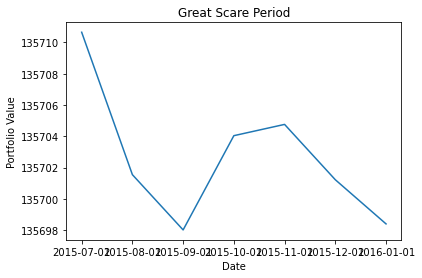

In [348]:
growth_scare["Portfolio"].plot()
plt.title('Great Scare Period')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')

## Growth Scenario: 2009-03-08 ~ 2010-04-22 

In [88]:
open_day='2009-03-08'
close_day='2010-04-22'
con1=df_R['date']>=open_day
con2=df_R['date']<=close_day
growth_scenario=df_R[con1&con2]
growth_scenario

,date,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R
36,2009-04-01,0.092455,0.083779,0.098266,0.009797,0.007886,-0.027951,0.110740
37,2009-05-01,0.050584,0.125702,0.052631,0.000000,-0.014017,0.010117,0.143037
38,2009-06-01,-0.012037,-0.013724,-0.030000,0.002400,0.002452,0.010016,0.013172
39,2009-07-01,0.084303,0.050263,0.094972,0.015744,0.010525,0.048166,0.067950
40,2009-08-01,0.033130,-0.001820,0.039497,0.007831,0.008309,-0.007056,0.080042
41,2009-09-01,0.032911,0.035866,0.020150,0.002364,-0.000485,0.002538,0.058710
42,2009-10-01,-0.013889,-0.040629,-0.030474,0.010073,0.007393,0.031393,-0.010885
43,2009-11-01,0.059652,0.059077,0.017462,0.013495,0.013619,0.004909,0.013060
44,2009-12-01,0.007037,0.009297,0.024599,-0.024634,-0.027352,0.003908,0.068140
45,2010-01-01,-0.028141,-0.053515,-0.021739,0.027760,0.027838,0.022395,0.035022


In [89]:
growth_scenario.to_csv('growth_scenario.csv',encoding='utf-8',index=False)

In [90]:
growth_scenario=pd.read_csv('growth_scenario.csv',index_col=0)
growth_scenario

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R
date,,,,,,,
2009-04-01,0.092455,0.083779,0.098266,0.009797,0.007886,-0.027951,0.110740
2009-05-01,0.050584,0.125702,0.052631,0.000000,-0.014017,0.010117,0.143037
2009-06-01,-0.012037,-0.013724,-0.030000,0.002400,0.002452,0.010016,0.013172
2009-07-01,0.084303,0.050263,0.094972,0.015744,0.010525,0.048166,0.067950
2009-08-01,0.033130,-0.001820,0.039497,0.007831,0.008309,-0.007056,0.080042
2009-09-01,0.032911,0.035866,0.020150,0.002364,-0.000485,0.002538,0.058710
2009-10-01,-0.013889,-0.040629,-0.030474,0.010073,0.007393,0.031393,-0.010885
2009-11-01,0.059652,0.059077,0.017462,0.013495,0.013619,0.004909,0.013060
2009-12-01,0.007037,0.009297,0.024599,-0.024634,-0.027352,0.003908,0.068140


In [91]:
XSPTO_R=  df['XSP.TO_P'].iloc[-1] * growth_scenario["XSP.TO_R"]
XSPTO_R = XSPTO_R.to_frame(name='XSP.TO_R')

XIUTO_R=  df['XIU.TO_P'].iloc[-1] * growth_scenario["XIU.TO_R"]
XIUTO_R = XIUTO_R.to_frame(name='XIU.TO_R')

XINTO_R=  df['XIN.TO_P'].iloc[-1] * growth_scenario["XIN.TO_R"]
XINTO_R = XINTO_R.to_frame(name='XIN.TO_R')

XBBTO_R=  df['XBB.TO_P'].iloc[-1] * growth_scenario["XBB.TO_R"]
XBBTO_R = XBBTO_R.to_frame(name='XBB.TO_R')

XGBTO_R=  df['XGB.TO_P'].iloc[-1] * growth_scenario["XGB.TO_R"]
XGBTO_R = XGBTO_R.to_frame(name='XGB.TO_R')

XRBTO_R=  df['XRB.TO_P'].iloc[-1] * growth_scenario["XRB.TO_R"]
XRBTO_R = XRBTO_R.to_frame(name='XRB.TO_R')

XRETO_R=  df['XRE.TO_P'].iloc[-1] * growth_scenario["XRE.TO_R"]
XRETO_R = XRETO_R.to_frame(name='XRE.TO_R')

In [92]:
growth_scenario = XSPTO_R.merge(XIUTO_R, on='date').merge(XINTO_R, on='date').merge(XBBTO_R, on='date').merge(XGBTO_R, on='date').merge(XRBTO_R, on='date').merge(XRETO_R, on='date')
growth_scenario

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R
date,,,,,,,
2009-04-01,4.248658,2.557774,2.922050,0.312042,0.174483,-0.724494,2.122160
2009-05-01,2.324524,3.837692,1.565056,0.000000,-0.310155,0.262244,2.741070
2009-06-01,-0.553157,-0.418999,-0.892085,0.076455,0.054252,0.259620,0.252414
2009-07-01,3.874052,1.534534,2.824099,0.501486,0.232884,1.248478,1.302156
2009-08-01,1.522457,-0.055569,1.174496,0.249446,0.183861,-0.182906,1.533873
2009-09-01,1.512393,1.095002,0.599175,0.075290,-0.010739,0.065784,1.125083
2009-10-01,-0.638240,-1.240408,-0.906179,0.320860,0.163580,0.813707,-0.208588
2009-11-01,2.741243,1.803623,0.519259,0.429857,0.301347,0.127243,0.250275
2009-12-01,0.323370,0.283842,0.731488,-0.784642,-0.605210,0.101304,1.305796


In [93]:
growth_scenario["Portfolio"] = growth_scenario.sum(axis=1)
growth_scenario

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R,Portfolio
date,,,,,,,,
2009-04-01,4.248658,2.557774,2.922050,0.312042,0.174483,-0.724494,2.122160,11.612673
2009-05-01,2.324524,3.837692,1.565056,0.000000,-0.310155,0.262244,2.741070,10.420429
2009-06-01,-0.553157,-0.418999,-0.892085,0.076455,0.054252,0.259620,0.252414,-1.221500
2009-07-01,3.874052,1.534534,2.824099,0.501486,0.232884,1.248478,1.302156,11.517688
2009-08-01,1.522457,-0.055569,1.174496,0.249446,0.183861,-0.182906,1.533873,4.425658
2009-09-01,1.512393,1.095002,0.599175,0.075290,-0.010739,0.065784,1.125083,4.461988
2009-10-01,-0.638240,-1.240408,-0.906179,0.320860,0.163580,0.813707,-0.208588,-1.695268
2009-11-01,2.741243,1.803623,0.519259,0.429857,0.301347,0.127243,0.250275,6.172846
2009-12-01,0.323370,0.283842,0.731488,-0.784642,-0.605210,0.101304,1.305796,1.355948


In [94]:
growth_scenario.iloc[0,7]= 11.612673 + 135705.400744
growth_scenario

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R,Portfolio
date,,,,,,,,
2009-04-01,4.248658,2.557774,2.922050,0.312042,0.174483,-0.724494,2.122160,135717.013417
2009-05-01,2.324524,3.837692,1.565056,0.000000,-0.310155,0.262244,2.741070,10.420429
2009-06-01,-0.553157,-0.418999,-0.892085,0.076455,0.054252,0.259620,0.252414,-1.221500
2009-07-01,3.874052,1.534534,2.824099,0.501486,0.232884,1.248478,1.302156,11.517688
2009-08-01,1.522457,-0.055569,1.174496,0.249446,0.183861,-0.182906,1.533873,4.425658
2009-09-01,1.512393,1.095002,0.599175,0.075290,-0.010739,0.065784,1.125083,4.461988
2009-10-01,-0.638240,-1.240408,-0.906179,0.320860,0.163580,0.813707,-0.208588,-1.695268
2009-11-01,2.741243,1.803623,0.519259,0.429857,0.301347,0.127243,0.250275,6.172846
2009-12-01,0.323370,0.283842,0.731488,-0.784642,-0.605210,0.101304,1.305796,1.355948


In [95]:
growth_scenario['Portfolio'] = np.cumsum(growth_scenario['Portfolio'])
growth_scenario

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R,Portfolio
date,,,,,,,,
2009-04-01,4.248658,2.557774,2.922050,0.312042,0.174483,-0.724494,2.122160,135717.013417
2009-05-01,2.324524,3.837692,1.565056,0.000000,-0.310155,0.262244,2.741070,135727.433846
2009-06-01,-0.553157,-0.418999,-0.892085,0.076455,0.054252,0.259620,0.252414,135726.212346
2009-07-01,3.874052,1.534534,2.824099,0.501486,0.232884,1.248478,1.302156,135737.730035
2009-08-01,1.522457,-0.055569,1.174496,0.249446,0.183861,-0.182906,1.533873,135742.155693
2009-09-01,1.512393,1.095002,0.599175,0.075290,-0.010739,0.065784,1.125083,135746.617680
2009-10-01,-0.638240,-1.240408,-0.906179,0.320860,0.163580,0.813707,-0.208588,135744.922412
2009-11-01,2.741243,1.803623,0.519259,0.429857,0.301347,0.127243,0.250275,135751.095259
2009-12-01,0.323370,0.283842,0.731488,-0.784642,-0.605210,0.101304,1.305796,135752.451207


In [96]:
growth_scenario.to_csv('growth_scenario.csv')

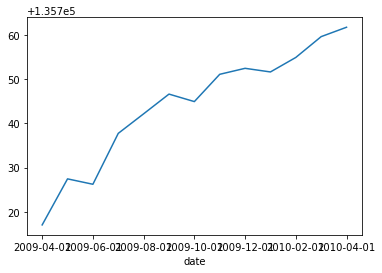

In [98]:
growth_scenario["Portfolio"].plot()

# Hypothetical Scenario 

In [147]:
df1 = pd.read_csv('ecodata.csv',index_col=0) 
df2 = pd.read_csv('factors.csv',index_col=0) 

In [148]:
df1

,ca_inf_rate,ca_gdp_rate,ca_int,us_fed,us_une,us_gdp_rate,us_inf_rate,FX USDCAD
DATE,,,,,,,,
1990-04-01,0.009190,-0.011242,12.634211,8.243333,5.333333,0.003627,0.009071,1.182573
1990-07-01,0.006938,0.006737,13.530000,8.160000,5.700000,0.000664,0.012711,1.170626
1990-10-01,0.008613,0.000970,12.936500,7.743333,6.133333,-0.009096,0.013227,1.153360
1991-01-01,0.009394,-0.015602,12.081951,6.426667,6.600000,-0.004686,0.005259,1.161153
1991-04-01,0.030034,0.017401,10.262750,5.863333,6.833333,0.007793,0.005457,1.155889
...,...,...,...,...,...,...,...,...
2020-07-01,0.000248,0.106392,0.218730,0.093333,8.800000,0.074789,0.009019,1.386302
2020-10-01,0.002228,0.006253,0.161111,0.090000,6.766667,0.010640,0.003632,1.331933
2021-01-01,0.005188,0.008449,0.104355,0.080000,6.166667,0.015535,0.009171,1.303295


In [168]:
ecodata = df1[:-2]
ecodata

,ca_inf_rate,ca_gdp_rate,ca_int,us_fed,us_une,us_gdp_rate,us_inf_rate,FX USDCAD
DATE,,,,,,,,
1990-04-01,0.009190,-0.011242,12.634211,8.243333,5.333333,0.003627,0.009071,1.182573
1990-07-01,0.006938,0.006737,13.530000,8.160000,5.700000,0.000664,0.012711,1.170626
1990-10-01,0.008613,0.000970,12.936500,7.743333,6.133333,-0.009096,0.013227,1.153360
1991-01-01,0.009394,-0.015602,12.081951,6.426667,6.600000,-0.004686,0.005259,1.161153
1991-04-01,0.030034,0.017401,10.262750,5.863333,6.833333,0.007793,0.005457,1.155889
...,...,...,...,...,...,...,...,...
2020-01-01,0.000249,-0.015392,1.657903,1.260000,3.800000,-0.012629,0.003197,1.320194
2020-04-01,0.005729,-0.112720,1.270317,0.060000,13.066667,-0.089863,-0.004040,1.343582
2020-07-01,0.000248,0.106392,0.218730,0.093333,8.800000,0.074789,0.009019,1.386302


In [149]:
df2

,Mkt-RF,SMB,HML,RMW,CMA
DATE,,,,,
1990-04-01,0.948779,1.015119,0.983616,1.008233,0.996346
1990-07-01,1.036350,0.985614,0.918707,1.022926,0.971438
1990-10-01,0.827485,0.894995,1.022390,0.991622,1.101221
1991-01-01,1.068741,0.954217,0.953059,1.066281,0.928876
1991-04-01,1.151910,1.121406,0.964297,1.009313,0.948184
...,...,...,...,...,...
2020-07-01,1.229435,1.068065,0.914299,1.032688,0.960492
2020-10-01,1.097078,0.961257,0.933085,1.036378,0.978417
2021-01-01,1.152061,1.170538,1.047804,0.945590,1.005144


In [169]:
factors = df2[:-2]
factors

,Mkt-RF,SMB,HML,RMW,CMA
DATE,,,,,
1990-04-01,0.948779,1.015119,0.983616,1.008233,0.996346
1990-07-01,1.036350,0.985614,0.918707,1.022926,0.971438
1990-10-01,0.827485,0.894995,1.022390,0.991622,1.101221
1991-01-01,1.068741,0.954217,0.953059,1.066281,0.928876
1991-04-01,1.151910,1.121406,0.964297,1.009313,0.948184
...,...,...,...,...,...
2020-01-01,1.089462,1.016678,0.979442,0.987548,0.990437
2020-04-01,0.794903,0.875624,0.774840,0.957126,0.963805
2020-07-01,1.229435,1.068065,0.914299,1.032688,0.960492


In [170]:
from statsmodels.tsa.api import VAR


In [171]:
df1_diff1 = df1.diff().dropna()
df1_diff1

,ca_inf_rate,ca_gdp_rate,ca_int,us_fed,us_une,us_gdp_rate,us_inf_rate,FX USDCAD
DATE,,,,,,,,
1990-07-01,-0.002252,0.017979,0.895789,-0.083333,0.366667,-0.002963,0.003640,-0.011947
1990-10-01,0.001675,-0.005767,-0.593500,-0.416667,0.433333,-0.009760,0.000516,-0.017266
1991-01-01,0.000781,-0.016572,-0.854549,-1.316666,0.466667,0.004410,-0.007968,0.007793
1991-04-01,0.020640,0.033003,-1.819201,-0.563334,0.233333,0.012479,0.000198,-0.005264
1991-07-01,-0.026749,-0.019839,-1.229795,-0.220000,0.033334,-0.002733,0.001335,-0.006879
...,...,...,...,...,...,...,...,...
2020-01-01,-0.003502,-0.020244,0.018697,-0.383333,0.200000,-0.018497,-0.000630,-0.000418
2020-04-01,0.005480,-0.097328,-0.387586,-1.200000,9.266667,-0.077234,-0.007237,0.023388
2020-07-01,-0.005481,0.219112,-1.051587,0.033333,-4.266667,0.164652,0.013059,0.042720


In [151]:
#model fitting
model = VAR(df1_diff1)
model_fitted = model.fit(1)

/Users/Grace/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'


In [152]:
# Get the lag order
lag_order = 1

# Input data for forecasting
forecast_input = df1_diff1.values[-lag_order:]
forecast_input

array([[ 0.00296 ,  0.002196, -0.056756, -0.01    , -0.6     ,  0.004895,
         0.005539, -0.028638]])

In [153]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [154]:
# Forecast (next 4 quarter)
num_q = 4
fc = model_fitted.forecast(y=forecast_input, steps=num_q)
df_forecast=pd.DataFrame(fc,index=pd.date_range(start=df1_diff1.index[-1], periods=num_q+1,freq='QS-OCT')[1:],columns=df1_diff1.columns)
df_forecast

,ca_inf_rate,ca_gdp_rate,ca_int,us_fed,us_une,us_gdp_rate,us_inf_rate,FX USDCAD
2021-04-01,-0.000682,-0.013106,-0.042848,-0.182732,0.128422,-0.010989,-0.003140,-0.032021
2021-07-01,-0.000128,0.003474,-0.170664,-0.165062,0.153729,0.003486,0.000338,0.006264
2021-10-01,0.000060,0.001921,-0.198865,-0.117478,-0.050833,0.001186,0.000076,0.001410
2022-01-01,-0.000089,-0.002022,-0.152502,-0.105952,0.037151,-0.001044,-0.000168,0.001342


In [172]:
# split data into TARGET (y) and FEATURES (x)
y1 = factors[['Mkt-RF']]
x = ecodata

In [173]:
x1 = sm.add_constant(x) # adding a constant

model = sm.OLS(y1, x1).fit()
predictions = model.predict(x1) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 Mkt-RF   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     3.396
Date:                Sat, 10 Jul 2021   Prob (F-statistic):            0.00155
Time:                        23:07:52   Log-Likelihood:                 143.50
No. Observations:                 124   AIC:                            -269.0
Df Residuals:                     115   BIC:                            -243.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.0157      0.085     11.985      

In [174]:
# split data into TARGET (y) and FEATURES (x)
y2 = factors[['SMB']]
x = ecodata

In [175]:
x1 = sm.add_constant(x) # adding a constant

model = sm.OLS(y2, x1).fit()
predictions = model.predict(x1) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                    SMB   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     2.402
Date:                Sat, 10 Jul 2021   Prob (F-statistic):             0.0196
Time:                        23:08:37   Log-Likelihood:                 203.06
No. Observations:                 124   AIC:                            -388.1
Df Residuals:                     115   BIC:                            -362.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.9451      0.052     18.029      

In [177]:
# split data into TARGET (y) and FEATURES (x)
y3 = factors[['HML']]
x = ecodata

In [178]:
x1 = sm.add_constant(x) # adding a constant

model = sm.OLS(y3, x1).fit()
predictions = model.predict(x1) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                    HML   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                 -0.026
Method:                 Least Squares   F-statistic:                    0.6120
Date:                Sat, 10 Jul 2021   Prob (F-statistic):              0.766
Time:                        23:09:19   Log-Likelihood:                 166.52
No. Observations:                 124   AIC:                            -315.0
Df Residuals:                     115   BIC:                            -289.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.0340      0.070     14.691      

In [179]:
# split data into TARGET (y) and FEATURES (x)
y4 = factors[['RMW']]
x = ecodata

In [180]:
x1 = sm.add_constant(x) # adding a constant

model = sm.OLS(y4, x1).fit()
predictions = model.predict(x1) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                    RMW   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     1.622
Date:                Sat, 10 Jul 2021   Prob (F-statistic):              0.126
Time:                        23:09:50   Log-Likelihood:                 205.11
No. Observations:                 124   AIC:                            -392.2
Df Residuals:                     115   BIC:                            -366.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.9667      0.052     18.749      

In [183]:
# split data into TARGET (y) and FEATURES (x)
y5 = factors[['CMA']]
x = ecodata

In [184]:
x1 = sm.add_constant(x) # adding a constant

model = sm.OLS(y5, x1).fit()
predictions = model.predict(x1) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                    CMA   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                 -0.036
Method:                 Least Squares   F-statistic:                    0.4721
Date:                Sat, 10 Jul 2021   Prob (F-statistic):              0.874
Time:                        23:10:37   Log-Likelihood:                 219.77
No. Observations:                 124   AIC:                            -421.5
Df Residuals:                     115   BIC:                            -396.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.9447      0.046     20.621      

In [210]:
B = [[1.5220,3.1430,-0.6574,1.9370,-1.2180], 
    [-0.0829, 0.1631,0.1660,1.7991,0.2586],
    [-0.0062,0.0003,0.0022,0.0008,0.0018],
    [0.0031,-0.0053,-0.0011,0.0005,-0.0011],
    [0.0029,0.0008,-0.0044,0.0006,0.0017],
    [2.6106,0.8723,0.5641,-1.9805,-0.3481],
    [3.5319,1.8515,-0.1984,-0.7281,-0.0407],
    [-0.0299,0.0305,-0.0078,0.0250,0.0425]]

In [211]:
B

[[1.522, 3.143, -0.6574, 1.937, -1.218],
 [-0.0829, 0.1631, 0.166, 1.7991, 0.2586],
 [-0.0062, 0.0003, 0.0022, 0.0008, 0.0018],
 [0.0031, -0.0053, -0.0011, 0.0005, -0.0011],
 [0.0029, 0.0008, -0.0044, 0.0006, 0.0017],
 [2.6106, 0.8723, 0.5641, -1.9805, -0.3481],
 [3.5319, 1.8515, -0.1984, -0.7281, -0.0407],
 [-0.0299, 0.0305, -0.0078, 0.025, 0.0425]]

In [205]:
B = pd.DataFrame(B)
B

,0,1,2,3,4
0,1.5220,3.1430,-0.6574,1.9370,-1.2180
1,-0.0829,0.1631,0.1660,1.7991,0.2586
2,-0.0062,0.0003,0.0022,0.0008,0.0018
3,0.0031,-0.0053,-0.0011,0.0005,-0.0011
4,0.0029,0.0008,-0.0044,0.0006,0.0017
5,2.6106,0.8723,0.5641,-1.9805,-0.3481
6,3.5319,1.8515,-0.1984,-0.7281,-0.0407
7,-0.0299,0.0305,-0.0078,0.0250,0.0425


In [208]:
arrB = B.to_numpy()
arrB

array([[ 1.5220e+00,  3.1430e+00, -6.5740e-01,  1.9370e+00, -1.2180e+00],
       [-8.2900e-02,  1.6310e-01,  1.6600e-01,  1.7991e+00,  2.5860e-01],
       [-6.2000e-03,  3.0000e-04,  2.2000e-03,  8.0000e-04,  1.8000e-03],
       [ 3.1000e-03, -5.3000e-03, -1.1000e-03,  5.0000e-04, -1.1000e-03],
       [ 2.9000e-03,  8.0000e-04, -4.4000e-03,  6.0000e-04,  1.7000e-03],
       [ 2.6106e+00,  8.7230e-01,  5.6410e-01, -1.9805e+00, -3.4810e-01],
       [ 3.5319e+00,  1.8515e+00, -1.9840e-01, -7.2810e-01, -4.0700e-02],
       [-2.9900e-02,  3.0500e-02, -7.8000e-03,  2.5000e-02,  4.2500e-02]])

In [212]:
A = [[-0.000682,-0.013106,-0.042848,-0.182732,0.128422,-0.010989,-0.003140,-0.032021],
    [-0.000128,0.003474,-0.170664,-0.165062,0.153729,0.003486,0.000338,0.006264],
    [0.000060,0.001921,-0.198865,-0.117478,-0.050833,0.001186,0.000076,0.001410],
    [-0.000089,-0.002022,-0.152502,-0.105952,0.037151,-0.001044,-0.000168,0.001342]]

In [213]:
A

[[-0.000682,
  -0.013106,
  -0.042848,
  -0.182732,
  0.128422,
  -0.010989,
  -0.00314,
  -0.032021],
 [-0.000128,
  0.003474,
  -0.170664,
  -0.165062,
  0.153729,
  0.003486,
  0.000338,
  0.006264],
 [6e-05,
  0.001921,
  -0.198865,
  -0.117478,
  -0.050833,
  0.001186,
  7.6e-05,
  0.00141],
 [-8.9e-05,
  -0.002022,
  -0.152502,
  -0.105952,
  0.037151,
  -0.001044,
  -0.000168,
  0.001342]]

In [216]:
result = [[0,0,0,0,0],
         [0,0,0,0,0],
         [0,0,0,0,0],
         [0,0,0,0,0]]

# iterate through rows of X
for i in range(len(A)):
   # iterate through columns of Y
   for j in range(len(B[0])):
       # iterate through rows of Y
       for k in range(len(B)):
           result[i][j] += A[i][k] * B[k][j]

for r in result:
   print(r)


[-0.0387005259, -0.019598807, -0.0075117215, -0.0016992062999999973, 0.00037583699999999996]
[0.010616468300000001, 0.004968614799999999, 0.0016410652000000002, -0.0011182081999999989, 0.00022897949999999999]
[0.0039758716, 0.0022424694, 0.0008377762, 0.0009550017, -0.00024747149999999993]
[-0.0026019865, -0.0012448016, -0.0012256218000000004, -0.0017393473999999997, -8.199789999999992e-05]


In [219]:
result

[[-0.0387005259,
  -0.019598807,
  -0.0075117215,
  -0.0016992062999999973,
  0.00037583699999999996],
 [0.010616468300000001,
  0.004968614799999999,
  0.0016410652000000002,
  -0.0011182081999999989,
  0.00022897949999999999],
 [0.0039758716,
  0.0022424694,
  0.0008377762,
  0.0009550017,
  -0.00024747149999999993],
 [-0.0026019865,
  -0.0012448016,
  -0.0012256218000000004,
  -0.0017393473999999997,
  -8.199789999999992e-05]]

In [220]:
mul = pd.DataFrame(result)
mul

,0,1,2,3,4
0,-0.038701,-0.019599,-0.007512,-0.001699,0.000376
1,0.010616,0.004969,0.001641,-0.001118,0.000229
2,0.003976,0.002242,0.000838,0.000955,-0.000247
3,-0.002602,-0.001245,-0.001226,-0.001739,-0.000082


In [222]:
mul[0] = mul[0] + 1.0157
mul[1] = mul[1] + 0.9451
mul[2] = mul[2] + 1.0340
mul[3] = mul[3] + 0.9667
mul[4] = mul[4] + 0.9447

In [223]:
mul

,0,1,2,3,4
0,0.976999,0.925501,1.026488,0.965001,0.945076
1,1.026316,0.950069,1.035641,0.965582,0.944929
2,1.019676,0.947342,1.034838,0.967655,0.944453
3,1.013098,0.943855,1.032774,0.964961,0.944618


In [231]:
MUL1 = mul.set_axis(['2021-04-01', '2021-07-01', '2021-10-01','2022-01-01'], axis='index')
MUL1

,0,1,2,3,4
2021-04-01,0.976999,0.925501,1.026488,0.965001,0.945076
2021-07-01,1.026316,0.950069,1.035641,0.965582,0.944929
2021-10-01,1.019676,0.947342,1.034838,0.967655,0.944453
2022-01-01,1.013098,0.943855,1.032774,0.964961,0.944618


In [232]:
MUL2 = MUL1.set_axis(['Mkt-RF', 'SMB', 'HML','RMW','CMA'], axis=1)
MUL2

,Mkt-RF,SMB,HML,RMW,CMA
2021-04-01,0.976999,0.925501,1.026488,0.965001,0.945076
2021-07-01,1.026316,0.950069,1.035641,0.965582,0.944929
2021-10-01,1.019676,0.947342,1.034838,0.967655,0.944453
2022-01-01,1.013098,0.943855,1.032774,0.964961,0.944618


In [235]:
#Each Asset Returns
df_R = pd.read_csv('df_R.csv',index_col=0) 
df_R

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R
DATE,,,,,,,
2006-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-05-01,-0.033333,-0.032005,-0.055877,0.003859,NaN,-0.009774,0.001456
2006-06-01,0.006896,-0.010370,0.011837,-0.016778,NaN,-0.017143,-0.005087
2006-07-01,0.001246,0.023036,0.002420,0.033027,NaN,0.044349,0.059085
2006-08-01,0.021144,0.022209,0.028169,0.018100,NaN,0.019467,0.029412
...,...,...,...,...,...,...,...
2021-02-01,0.027277,0.036510,0.027902,-0.027332,-0.031403,-0.042799,0.038749
2021-03-01,0.044093,0.052981,0.050670,-0.012858,-0.014470,-0.008554,0.047735
2021-04-01,0.050630,0.023050,0.011023,0.000277,0.001321,-0.020000,0.046759


In [239]:
OLS2 = df_R.merge(factors, on='DATE').dropna()
OLS2

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R,Mkt-RF,SMB,HML,RMW,CMA
DATE,,,,,,,,,,,,
2007-01-01,0.012958,0.012409,0.041719,0.008516,0.001713,0.008403,0.064424,1.059087,1.019335,1.024835,0.994892,1.014150
2007-04-01,0.043065,0.021492,0.024225,0.010381,0.007456,0.009840,0.034727,1.000886,1.016639,0.983183,1.006381,0.989112
2007-07-01,-0.029178,0.007546,-0.038449,0.014820,0.012548,0.018526,-0.034879,1.047490,0.990791,0.969207,1.032215,0.997768
2007-10-01,0.014644,0.045350,0.029076,0.017006,0.016859,0.003752,-0.033252,1.002841,0.944002,0.925170,0.983236,0.952864
2008-01-01,-0.050061,-0.040450,-0.085962,0.016032,0.015824,0.002308,-0.037990,0.960402,0.972059,0.955520,1.023079,0.984751
2008-04-01,0.050487,0.064680,0.062150,0.005007,-0.000715,-0.018482,0.036814,0.899026,0.996659,1.029016,1.043461,1.015919
2008-07-01,0.000103,-0.045418,-0.009269,0.019110,0.017818,0.011825,0.001648,0.975531,1.032506,0.949003,1.081414,0.970895
2008-10-01,-0.208761,-0.164559,-0.185520,0.001108,0.001842,-0.044920,-0.211617,0.914391,1.074534,1.132790,1.029826,1.036920
2009-01-01,-0.082629,-0.025327,-0.096240,-0.001990,-0.006149,-0.006211,0.034566,0.775913,0.960612,0.915976,1.076368,1.032161


In [240]:
OLS2.to_csv('OLS2.csv')

In [242]:
asset_r = pd.read_csv('OLS2_asset.csv',index_col=0) 
asset_r

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R
DATE,,,,,,,
2007-01-01,0.012958,0.012409,0.041719,0.008516,0.001713,0.008403,0.064424
2007-04-01,0.043065,0.021492,0.024225,0.010381,0.007456,0.009840,0.034727
2007-07-01,-0.029178,0.007546,-0.038449,0.014820,0.012548,0.018526,-0.034879
2007-10-01,0.014644,0.045350,0.029076,0.017006,0.016859,0.003752,-0.033252
2008-01-01,-0.050061,-0.040450,-0.085962,0.016032,0.015824,0.002308,-0.037990
2008-04-01,0.050487,0.064680,0.062150,0.005007,-0.000715,-0.018482,0.036814
2008-07-01,0.000103,-0.045418,-0.009269,0.019110,0.017818,0.011825,0.001648
2008-10-01,-0.208761,-0.164559,-0.185520,0.001108,0.001842,-0.044920,-0.211617
2009-01-01,-0.082629,-0.025327,-0.096240,-0.001990,-0.006149,-0.006211,0.034566


In [243]:
factors_q = pd.read_csv('OLS2_factors.csv',index_col=0) 
factors_q

,Mkt-RF,SMB,HML,RMW,CMA
DATE,,,,,
2007-01-01,1.059087,1.019335,1.024835,0.994892,1.014150
2007-04-01,1.000886,1.016639,0.983183,1.006381,0.989112
2007-07-01,1.047490,0.990791,0.969207,1.032215,0.997768
2007-10-01,1.002841,0.944002,0.925170,0.983236,0.952864
2008-01-01,0.960402,0.972059,0.955520,1.023079,0.984751
2008-04-01,0.899026,0.996659,1.029016,1.043461,1.015919
2008-07-01,0.975531,1.032506,0.949003,1.081414,0.970895
2008-10-01,0.914391,1.074534,1.132790,1.029826,1.036920
2009-01-01,0.775913,0.960612,0.915976,1.076368,1.032161


In [245]:
# split data into TARGET (y) and FEATURES (x)
Y1 = asset_r[['XSP.TO_R']]
X = factors_q

In [246]:
X1 = sm.add_constant(X) # adding a constant

model = sm.OLS(Y1, X1).fit()
predictions = model.predict(X1) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               XSP.TO_R   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     2.014
Date:                Sun, 11 Jul 2021   Prob (F-statistic):             0.0923
Time:                        00:35:57   Log-Likelihood:                 93.303
No. Observations:                  57   AIC:                            -174.6
Df Residuals:                      51   BIC:                            -162.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9573      0.406      2.357      0.0

In [247]:
# split data into TARGET (y) and FEATURES (x)
Y2 = asset_r[['XIU.TO_R']]
X = factors_q

In [248]:
X1 = sm.add_constant(X) # adding a constant

model = sm.OLS(Y2, X1).fit()
predictions = model.predict(X1) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               XIU.TO_R   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     3.463
Date:                Sun, 11 Jul 2021   Prob (F-statistic):            0.00904
Time:                        00:36:36   Log-Likelihood:                 110.25
No. Observations:                  57   AIC:                            -208.5
Df Residuals:                      51   BIC:                            -196.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8715      0.302      2.888      0.0

In [249]:
# split data into TARGET (y) and FEATURES (x)
Y3 = asset_r[['XIN.TO_R']]
X = factors_q

In [250]:
X1 = sm.add_constant(X) # adding a constant

model = sm.OLS(Y3, X1).fit()
predictions = model.predict(X1) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               XIN.TO_R   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     1.891
Date:                Sun, 11 Jul 2021   Prob (F-statistic):              0.112
Time:                        00:37:12   Log-Likelihood:                 96.581
No. Observations:                  57   AIC:                            -181.2
Df Residuals:                      51   BIC:                            -168.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0316      0.384      2.690      0.0

In [251]:
# split data into TARGET (y) and FEATURES (x)
Y4 = asset_r[['XBB.TO_R']]
X = factors_q

In [252]:
X1 = sm.add_constant(X) # adding a constant

model = sm.OLS(Y4, X1).fit()
predictions = model.predict(X1) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               XBB.TO_R   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     1.268
Date:                Sun, 11 Jul 2021   Prob (F-statistic):              0.292
Time:                        00:37:44   Log-Likelihood:                 168.92
No. Observations:                  57   AIC:                            -325.8
Df Residuals:                      51   BIC:                            -313.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0888      0.108      0.824      0.4

In [253]:
# split data into TARGET (y) and FEATURES (x)
Y5 = asset_r[['XGB.TO_R']]
X = factors_q

In [254]:
X1 = sm.add_constant(X) # adding a constant

model = sm.OLS(Y5, X1).fit()
predictions = model.predict(X1) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               XGB.TO_R   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                 -0.025
Method:                 Least Squares   F-statistic:                    0.7321
Date:                Sun, 11 Jul 2021   Prob (F-statistic):              0.603
Time:                        00:38:22   Log-Likelihood:                 169.61
No. Observations:                  57   AIC:                            -327.2
Df Residuals:                      51   BIC:                            -315.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0458      0.107      0.430      0.6

In [255]:
# split data into TARGET (y) and FEATURES (x)
Y6 = asset_r[['XRB.TO_R']]
X = factors_q

In [256]:
X1 = sm.add_constant(X) # adding a constant

model = sm.OLS(Y6, X1).fit()
predictions = model.predict(X1) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               XRB.TO_R   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     1.446
Date:                Sun, 11 Jul 2021   Prob (F-statistic):              0.224
Time:                        00:39:07   Log-Likelihood:                 132.99
No. Observations:                  57   AIC:                            -254.0
Df Residuals:                      51   BIC:                            -241.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0196      0.202     -0.097      0.9

In [257]:
# split data into TARGET (y) and FEATURES (x)
Y7 = asset_r[['XRE.TO_R']]
X = factors_q

In [258]:
X1 = sm.add_constant(X) # adding a constant

model = sm.OLS(Y7, X1).fit()
predictions = model.predict(X1) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               XRE.TO_R   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     2.775
Date:                Sun, 11 Jul 2021   Prob (F-statistic):             0.0272
Time:                        00:39:49   Log-Likelihood:                 104.31
No. Observations:                  57   AIC:                            -196.6
Df Residuals:                      51   BIC:                            -184.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1014      0.335      0.303      0.7

In [259]:
C = [[0.976999,0.925501,1.026488,0.965001,0.945076],
    [1.026316,0.950069,1.035641,0.965582,0.944929],
    [1.019676,0.947342,1.034838,0.967655,0.944453],
    [1.013098,0.943855,1.032774,0.964961,0.944618]]
C

[[0.976999, 0.925501, 1.026488, 0.965001, 0.945076],
 [1.026316, 0.950069, 1.035641, 0.965582, 0.944929],
 [1.019676, 0.947342, 1.034838, 0.967655, 0.944453],
 [1.013098, 0.943855, 1.032774, 0.964961, 0.944618]]

In [260]:
D = [[-0.0028,-0.0387,-0.0584,-0.0009,0.0111,0.1061,0.0277],
    [-0.2369,-0.1421,-0.1231,-0.0259,-0.0244,-0.0752,-0.0396],
    [-0.1671,-0.1925,-0.0398,-0.0763,-0.0579,-0.1145,-0.4360],
    [-0.4667,-0.5333,-0.5717,-0.0370,-0.0040,0.0369,-0.2460],
    [-0.0651,0.0503,-0.2202,0.0575,0.0335,0.0725,0.6023]]
D

[[-0.0028, -0.0387, -0.0584, -0.0009, 0.0111, 0.1061, 0.0277],
 [-0.2369, -0.1421, -0.1231, -0.0259, -0.0244, -0.0752, -0.0396],
 [-0.1671, -0.1925, -0.0398, -0.0763, -0.0579, -0.1145, -0.436],
 [-0.4667, -0.5333, -0.5717, -0.037, -0.004, 0.0369, -0.246],
 [-0.0651, 0.0503, -0.2202, 0.0575, 0.0335, 0.0725, 0.6023]]

In [261]:
result = [[0,0,0,0,0,0,0],
         [0,0,0,0,0,0,0],
         [0,0,0,0,0,0,0],
         [0,0,0,0,0,0,0]]

# iterate through rows of X
for i in range(len(C)):
   # iterate through columns of Y
   for j in range(len(D[0])):
       # iterate through rows of Y
       for k in range(len(D)):
           result[i][j] += C[i][k] * D[k][j]

for r in result:
   print(r)


[-0.9054033432, -0.8340202039000001, -0.9716369439999999, -0.08453397639999999, -0.04337114870000001, 0.020655589599999982, -0.1253067065000001]
[-0.9131526393, -0.8414990785, -0.9782054553, -0.08594299629999999, -0.0439603964, 0.02300337259999999, -0.12913569050000018]
[-0.9132903212, -0.8418295, -0.9785303451, -0.0859091931, -0.0439453059, 0.022637866199999995, -0.12965817410000002]
[-0.9108543898, -0.839237099, -0.9761309662, -0.0855463109, -0.0437974298, 0.02235104469999999, -0.12804029200000022]


In [262]:
result

[[-0.9054033432,
  -0.8340202039000001,
  -0.9716369439999999,
  -0.08453397639999999,
  -0.04337114870000001,
  0.020655589599999982,
  -0.1253067065000001],
 [-0.9131526393,
  -0.8414990785,
  -0.9782054553,
  -0.08594299629999999,
  -0.0439603964,
  0.02300337259999999,
  -0.12913569050000018],
 [-0.9132903212,
  -0.8418295,
  -0.9785303451,
  -0.0859091931,
  -0.0439453059,
  0.022637866199999995,
  -0.12965817410000002],
 [-0.9108543898,
  -0.839237099,
  -0.9761309662,
  -0.0855463109,
  -0.0437974298,
  0.02235104469999999,
  -0.12804029200000022]]

In [263]:
mul2 = pd.DataFrame(result)
mul2

,0,1,2,3,4,5,6
0,-0.905403,-0.834020,-0.971637,-0.084534,-0.043371,0.020656,-0.125307
1,-0.913153,-0.841499,-0.978205,-0.085943,-0.043960,0.023003,-0.129136
2,-0.913290,-0.841830,-0.978530,-0.085909,-0.043945,0.022638,-0.129658
3,-0.910854,-0.839237,-0.976131,-0.085546,-0.043797,0.022351,-0.128040


In [264]:
mul2[0] = mul2[0] + 0.9573
mul2[1] = mul2[1] + 0.8715
mul2[2] = mul2[2] + 1.0316
mul2[3] = mul2[3] + 0.0888
mul2[4] = mul2[4] + 0.0458
mul2[5] = mul2[5] -0.0196
mul2[6] = mul2[6] + 0.1014


In [265]:
mul2

,0,1,2,3,4,5,6
0,0.051897,0.037480,0.059963,0.004266,0.002429,0.001056,-0.023907
1,0.044147,0.030001,0.053395,0.002857,0.001840,0.003403,-0.027736
2,0.044010,0.029671,0.053070,0.002891,0.001855,0.003038,-0.028258
3,0.046446,0.032263,0.055469,0.003254,0.002003,0.002751,-0.026640


In [266]:
MUL11 = mul2.set_axis(['2021-04-01', '2021-07-01', '2021-10-01','2022-01-01'], axis='index')
MUL11

,0,1,2,3,4,5,6
2021-04-01,0.051897,0.037480,0.059963,0.004266,0.002429,0.001056,-0.023907
2021-07-01,0.044147,0.030001,0.053395,0.002857,0.001840,0.003403,-0.027736
2021-10-01,0.044010,0.029671,0.053070,0.002891,0.001855,0.003038,-0.028258
2022-01-01,0.046446,0.032263,0.055469,0.003254,0.002003,0.002751,-0.026640


In [267]:
MUL22 = MUL11.set_axis(['XSP.TO_R','XIU.TO_R','XIN.TO_R','XBB.TO_R','XGB.TO_R','XRB.TO_R','XRE.TO_R'], axis=1)
MUL22

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R
2021-04-01,0.051897,0.037480,0.059963,0.004266,0.002429,0.001056,-0.023907
2021-07-01,0.044147,0.030001,0.053395,0.002857,0.001840,0.003403,-0.027736
2021-10-01,0.044010,0.029671,0.053070,0.002891,0.001855,0.003038,-0.028258
2022-01-01,0.046446,0.032263,0.055469,0.003254,0.002003,0.002751,-0.026640


In [268]:
XSPTO_R=  df['XSP.TO_P'].iloc[-1] * MUL22["XSP.TO_R"]
XSPTO_R = XSPTO_R.to_frame(name='XSP.TO_R')

XIUTO_R=  df['XIU.TO_P'].iloc[-1] * MUL22["XIU.TO_R"]
XIUTO_R = XIUTO_R.to_frame(name='XIU.TO_R')

XINTO_R=  df['XIN.TO_P'].iloc[-1] * MUL22["XIN.TO_R"]
XINTO_R = XINTO_R.to_frame(name='XIN.TO_R')

XBBTO_R=  df['XBB.TO_P'].iloc[-1] * MUL22["XBB.TO_R"]
XBBTO_R = XBBTO_R.to_frame(name='XBB.TO_R')

XGBTO_R=  df['XGB.TO_P'].iloc[-1] * MUL22["XGB.TO_R"]
XGBTO_R = XGBTO_R.to_frame(name='XGB.TO_R')

XRBTO_R=  df['XRB.TO_P'].iloc[-1] * MUL22["XRB.TO_R"]
XRBTO_R = XRBTO_R.to_frame(name='XRB.TO_R')

XRETO_R=  df['XRE.TO_P'].iloc[-1] * MUL22["XRE.TO_R"]
XRETO_R = XRETO_R.to_frame(name='XRE.TO_R')

In [286]:
predict_asset = XSPTO_R.merge(XIUTO_R, left_index=True, right_index=True).merge(XINTO_R, left_index=True, right_index=True).merge(XBBTO_R, left_index=True, right_index=True).merge(XGBTO_R, left_index=True, right_index=True).merge(XRBTO_R, left_index=True, right_index=True).merge(XRETO_R, left_index=True, right_index=True)
predict_asset

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R
2021-04-01,2.384856,1.144258,1.783071,0.135881,0.053743,0.027361,-0.458133
2021-07-01,2.028745,0.915928,1.587748,0.091001,0.040705,0.088216,-0.531509
2021-10-01,2.022418,0.905840,1.578087,0.092078,0.041039,0.078742,-0.541522
2022-01-01,2.134359,0.984986,1.649436,0.103637,0.044311,0.071308,-0.510518


In [287]:
predict_asset["Portfolio"] = predict_asset.sum(axis=1)
predict_asset

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R,Portfolio
2021-04-01,2.384856,1.144258,1.783071,0.135881,0.053743,0.027361,-0.458133,5.071038
2021-07-01,2.028745,0.915928,1.587748,0.091001,0.040705,0.088216,-0.531509,4.220836
2021-10-01,2.022418,0.905840,1.578087,0.092078,0.041039,0.078742,-0.541522,4.176684
2022-01-01,2.134359,0.984986,1.649436,0.103637,0.044311,0.071308,-0.510518,4.477519


In [288]:
predict_asset.iloc[0,7]= 5.071038 + 135705.400744
predict_asset

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R,Portfolio
2021-04-01,2.384856,1.144258,1.783071,0.135881,0.053743,0.027361,-0.458133,135710.471782
2021-07-01,2.028745,0.915928,1.587748,0.091001,0.040705,0.088216,-0.531509,4.220836
2021-10-01,2.022418,0.905840,1.578087,0.092078,0.041039,0.078742,-0.541522,4.176684
2022-01-01,2.134359,0.984986,1.649436,0.103637,0.044311,0.071308,-0.510518,4.477519


In [289]:
predict_asset['Portfolio'] = np.cumsum(predict_asset['Portfolio'])
predict_asset

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R,Portfolio
2021-04-01,2.384856,1.144258,1.783071,0.135881,0.053743,0.027361,-0.458133,135710.471782
2021-07-01,2.028745,0.915928,1.587748,0.091001,0.040705,0.088216,-0.531509,135714.692618
2021-10-01,2.022418,0.905840,1.578087,0.092078,0.041039,0.078742,-0.541522,135718.869301
2022-01-01,2.134359,0.984986,1.649436,0.103637,0.044311,0.071308,-0.510518,135723.346820


In [290]:
predict_asset.to_csv('predict_asset_base.csv')

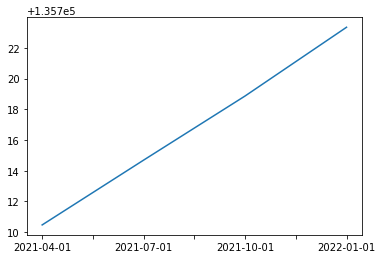

In [291]:
predict_asset["Portfolio"].plot()

## GDP suddenly increase 2% 

In [298]:
df1_diff1

,ca_inf_rate,ca_gdp_rate,ca_int,us_fed,us_une,us_gdp_rate,us_inf_rate,FX USDCAD
DATE,,,,,,,,
1990-07-01,-0.002252,0.017979,0.895789,-0.083333,0.366667,-0.002963,0.003640,-0.011947
1990-10-01,0.001675,-0.005767,-0.593500,-0.416667,0.433333,-0.009760,0.000516,-0.017266
1991-01-01,0.000781,-0.016572,-0.854549,-1.316666,0.466667,0.004410,-0.007968,0.007793
1991-04-01,0.020640,0.033003,-1.819201,-0.563334,0.233333,0.012479,0.000198,-0.005264
1991-07-01,-0.026749,-0.019839,-1.229795,-0.220000,0.033334,-0.002733,0.001335,-0.006879
...,...,...,...,...,...,...,...,...
2020-01-01,-0.003502,-0.020244,0.018697,-0.383333,0.200000,-0.018497,-0.000630,-0.000418
2020-04-01,0.005480,-0.097328,-0.387586,-1.200000,9.266667,-0.077234,-0.007237,0.023388
2020-07-01,-0.005481,0.219112,-1.051587,0.033333,-4.266667,0.164652,0.013059,0.042720


In [299]:
lastrow = df1_diff1.iloc[-1:]
lastrow

,ca_inf_rate,ca_gdp_rate,ca_int,us_fed,us_une,us_gdp_rate,us_inf_rate,FX USDCAD
DATE,,,,,,,,
2021-01-01,0.00296,0.002196,-0.056756,-0.01,-0.6,0.004895,0.005539,-0.028638


In [300]:
lastrow['ca_gdp_rate'] = lastrow['ca_gdp_rate'] * (1+0.02)


<ipython-input-300-774827da9c3c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lastrow['ca_gdp_rate'] = lastrow['ca_gdp_rate'] * (1+0.02)


In [301]:
lastrow

,ca_inf_rate,ca_gdp_rate,ca_int,us_fed,us_une,us_gdp_rate,us_inf_rate,FX USDCAD
DATE,,,,,,,,
2021-01-01,0.00296,0.00224,-0.056756,-0.01,-0.6,0.004895,0.005539,-0.028638


In [302]:
forecast_input_gdp = lastrow.values
forecast_input_gdp

array([[ 0.00296   ,  0.00223992, -0.056756  , -0.01      , -0.6       ,
         0.004895  ,  0.005539  , -0.028638  ]])

In [303]:
# Forecast (next 4 quarter)
num_q = 4
fc = model_fitted.forecast(y=forecast_input_gdp, steps=num_q)
df_forecast=pd.DataFrame(fc,index=pd.date_range(start=df1_diff1.index[-1], periods=num_q+1,freq='QS-OCT')[1:],columns=df1_diff1.columns)
df_forecast

,ca_inf_rate,ca_gdp_rate,ca_int,us_fed,us_une,us_gdp_rate,us_inf_rate,FX USDCAD
2021-04-01,-0.000688,-0.013124,-0.043034,-0.182797,0.128358,-0.010983,-0.003141,-0.032020
2021-07-01,-0.000122,0.003482,-0.170600,-0.165010,0.153797,0.003481,0.000340,0.006273
2021-10-01,0.000056,0.001918,-0.198897,-0.117510,-0.050876,0.001189,0.000075,0.001402
2022-01-01,-0.000087,-0.002021,-0.152486,-0.105931,0.037171,-0.001046,-0.000167,0.001347


In [304]:
B = [[1.5220,3.1430,-0.6574,1.9370,-1.2180], 
    [-0.0829, 0.1631,0.1660,1.7991,0.2586],
    [-0.0062,0.0003,0.0022,0.0008,0.0018],
    [0.0031,-0.0053,-0.0011,0.0005,-0.0011],
    [0.0029,0.0008,-0.0044,0.0006,0.0017],
    [2.6106,0.8723,0.5641,-1.9805,-0.3481],
    [3.5319,1.8515,-0.1984,-0.7281,-0.0407],
    [-0.0299,0.0305,-0.0078,0.0250,0.0425]]
B

[[1.522, 3.143, -0.6574, 1.937, -1.218],
 [-0.0829, 0.1631, 0.166, 1.7991, 0.2586],
 [-0.0062, 0.0003, 0.0022, 0.0008, 0.0018],
 [0.0031, -0.0053, -0.0011, 0.0005, -0.0011],
 [0.0029, 0.0008, -0.0044, 0.0006, 0.0017],
 [2.6106, 0.8723, 0.5641, -1.9805, -0.3481],
 [3.5319, 1.8515, -0.1984, -0.7281, -0.0407],
 [-0.0299, 0.0305, -0.0078, 0.025, 0.0425]]

In [305]:
A = [[-0.000688,-0.013124,-0.043034,-0.182797,0.128358,-0.010983,-0.003141,-0.032020],
    [-0.000122,0.003482,-0.170600,-0.165010,0.153797,0.003481,0.000340,0.006273],
    [0.000056,0.001918,-0.198897,-0.117510,-0.050876,0.001189,0.000075,0.001402],
    [-0.000087,-0.002021,-0.152486,-0.105931,0.037171,-0.001046,-0.000167,0.001347]]
A

[[-0.000688,
  -0.013124,
  -0.043034,
  -0.182797,
  0.128358,
  -0.010983,
  -0.003141,
  -0.03202],
 [-0.000122,
  0.003482,
  -0.1706,
  -0.16501,
  0.153797,
  0.003481,
  0.00034,
  0.006273],
 [5.6e-05,
  0.001918,
  -0.198897,
  -0.11751,
  -0.050876,
  0.001189,
  7.5e-05,
  0.001402],
 [-8.7e-05,
  -0.002021,
  -0.152486,
  -0.105931,
  0.037171,
  -0.001046,
  -0.000167,
  0.001347]]

In [306]:
result = [[0,0,0,0,0],
         [0,0,0,0,0],
         [0,0,0,0,0],
         [0,0,0,0,0]]

# iterate through rows of X
for i in range(len(A)):
   # iterate through columns of Y
   for j in range(len(B[0])):
       # iterate through rows of Y
       for k in range(len(B)):
           result[i][j] += A[i][k] * B[k][j]

for r in result:
   print(r)


[-0.0386952978, -0.019616950499999997, -0.007507246000000001, -0.0017545616999999993, 0.00037611269999999987]
[0.0106186404, 0.0049881916, 0.0016349457000000005, -0.001083404099999999, 0.00022595549999999975]
[0.0039745459, 0.0022300551000000004, 0.0008420149000000002, 0.0009363755999999996, -0.0002448143999999999]
[-0.0026008402999999998, -0.0012381836, -0.0012282121, -0.0017302810999999993, -8.326759999999996e-05]


In [307]:
result

[[-0.0386952978,
  -0.019616950499999997,
  -0.007507246000000001,
  -0.0017545616999999993,
  0.00037611269999999987],
 [0.0106186404,
  0.0049881916,
  0.0016349457000000005,
  -0.001083404099999999,
  0.00022595549999999975],
 [0.0039745459,
  0.0022300551000000004,
  0.0008420149000000002,
  0.0009363755999999996,
  -0.0002448143999999999],
 [-0.0026008402999999998,
  -0.0012381836,
  -0.0012282121,
  -0.0017302810999999993,
  -8.326759999999996e-05]]

In [308]:
mul_gdp = pd.DataFrame(result)
mul_gdp

,0,1,2,3,4
0,-0.038695,-0.019617,-0.007507,-0.001755,0.000376
1,0.010619,0.004988,0.001635,-0.001083,0.000226
2,0.003975,0.002230,0.000842,0.000936,-0.000245
3,-0.002601,-0.001238,-0.001228,-0.001730,-0.000083


In [310]:
mul_gdp[0] = mul_gdp[0] + 1.0157
mul_gdp[1] = mul_gdp[1] + 0.9451
mul_gdp[2] = mul_gdp[2] + 1.0340
mul_gdp[3] = mul_gdp[3] + 0.9667
mul_gdp[4] = mul_gdp[4] + 0.9447

In [311]:
mul_gdp

,0,1,2,3,4
0,0.977005,0.925483,1.026493,0.964945,0.945076
1,1.026319,0.950088,1.035635,0.965617,0.944926
2,1.019675,0.947330,1.034842,0.967636,0.944455
3,1.013099,0.943862,1.032772,0.964970,0.944617


In [312]:
MUL_gdp = mul_gdp.set_axis(['2021-04-01', '2021-07-01', '2021-10-01','2022-01-01'], axis='index')
MUL_gdp

,0,1,2,3,4
2021-04-01,0.977005,0.925483,1.026493,0.964945,0.945076
2021-07-01,1.026319,0.950088,1.035635,0.965617,0.944926
2021-10-01,1.019675,0.947330,1.034842,0.967636,0.944455
2022-01-01,1.013099,0.943862,1.032772,0.964970,0.944617


In [313]:
MUL_gdp = MUL_gdp.set_axis(['Mkt-RF', 'SMB', 'HML','RMW','CMA'], axis=1)
MUL_gdp

,Mkt-RF,SMB,HML,RMW,CMA
2021-04-01,0.977005,0.925483,1.026493,0.964945,0.945076
2021-07-01,1.026319,0.950088,1.035635,0.965617,0.944926
2021-10-01,1.019675,0.947330,1.034842,0.967636,0.944455
2022-01-01,1.013099,0.943862,1.032772,0.964970,0.944617


In [314]:
C = [[0.977005,0.925483,1.026493,0.964945,0.945076],
    [1.026319,0.950088,1.035635,0.965617,0.944926],
    [1.019675,0.947330,1.034842,0.967636,0.944455],
    [1.013099,0.943862,1.032772,0.964970,0.944617]]
C

[[0.977005, 0.925483, 1.026493, 0.964945, 0.945076],
 [1.026319, 0.950088, 1.035635, 0.965617, 0.944926],
 [1.019675, 0.94733, 1.034842, 0.967636, 0.944455],
 [1.013099, 0.943862, 1.032772, 0.96497, 0.944617]]

In [315]:
D = [[-0.0028,-0.0387,-0.0584,-0.0009,0.0111,0.1061,0.0277],
    [-0.2369,-0.1421,-0.1231,-0.0259,-0.0244,-0.0752,-0.0396],
    [-0.1671,-0.1925,-0.0398,-0.0763,-0.0579,-0.1145,-0.4360],
    [-0.4667,-0.5333,-0.5717,-0.0370,-0.0040,0.0369,-0.2460],
    [-0.0651,0.0503,-0.2202,0.0575,0.0335,0.0725,0.6023]]
D

[[-0.0028, -0.0387, -0.0584, -0.0009, 0.0111, 0.1061, 0.0277],
 [-0.2369, -0.1421, -0.1231, -0.0259, -0.0244, -0.0752, -0.0396],
 [-0.1671, -0.1925, -0.0398, -0.0763, -0.0579, -0.1145, -0.436],
 [-0.4667, -0.5333, -0.5717, -0.037, -0.004, 0.0369, -0.246],
 [-0.0651, 0.0503, -0.2202, 0.0575, 0.0335, 0.0725, 0.6023]]

In [316]:
result = [[0,0,0,0,0,0,0],
         [0,0,0,0,0,0,0],
         [0,0,0,0,0,0,0],
         [0,0,0,0,0,0,0]]

# iterate through rows of X
for i in range(len(C)):
   # iterate through columns of Y
   for j in range(len(D[0])):
       # iterate through rows of Y
       for k in range(len(D)):
           result[i][j] += C[i][k] * D[k][j]

for r in result:
   print(r)

[-0.9053737961, -0.8339889760000001, -0.9716032624, -0.08453182510000001, -0.043370708400000006, 0.020654940899999988, -0.12529423150000008]
[-0.9131722854000001, -0.8415195558999999, -0.9782270795, -0.08594450080000002, -0.043960719800000006, 0.023004023099999958, -0.12914416070000012]
[-0.9132794069000001, -0.8418182928000001, -0.9785185468, -0.0859083686, -0.0439451128, 0.0226376484, -0.12965359199999993]
[-0.9108598519, -0.8392425974, -0.9761367317999999, -0.08554673099999999, -0.0437975432, 0.022351112999999978, -0.1280424858]


In [317]:
result

[[-0.9053737961,
  -0.8339889760000001,
  -0.9716032624,
  -0.08453182510000001,
  -0.043370708400000006,
  0.020654940899999988,
  -0.12529423150000008],
 [-0.9131722854000001,
  -0.8415195558999999,
  -0.9782270795,
  -0.08594450080000002,
  -0.043960719800000006,
  0.023004023099999958,
  -0.12914416070000012],
 [-0.9132794069000001,
  -0.8418182928000001,
  -0.9785185468,
  -0.0859083686,
  -0.0439451128,
  0.0226376484,
  -0.12965359199999993],
 [-0.9108598519,
  -0.8392425974,
  -0.9761367317999999,
  -0.08554673099999999,
  -0.0437975432,
  0.022351112999999978,
  -0.1280424858]]

In [318]:
mul_gdp2 = pd.DataFrame(result)
mul_gdp2

,0,1,2,3,4,5,6
0,-0.905374,-0.833989,-0.971603,-0.084532,-0.043371,0.020655,-0.125294
1,-0.913172,-0.841520,-0.978227,-0.085945,-0.043961,0.023004,-0.129144
2,-0.913279,-0.841818,-0.978519,-0.085908,-0.043945,0.022638,-0.129654
3,-0.910860,-0.839243,-0.976137,-0.085547,-0.043798,0.022351,-0.128042


In [319]:
mul_gdp2[0] = mul_gdp2[0] + 0.9573
mul_gdp2[1] = mul_gdp2[1] + 0.8715
mul_gdp2[2] = mul_gdp2[2] + 1.0316
mul_gdp2[3] = mul_gdp2[3] + 0.0888
mul_gdp2[4] = mul_gdp2[4] + 0.0458
mul_gdp2[5] = mul_gdp2[5] -0.0196
mul_gdp2[6] = mul_gdp2[6] + 0.1014

In [320]:
mul_gdp2

,0,1,2,3,4,5,6
0,0.051926,0.037511,0.059997,0.004268,0.002429,0.001055,-0.023894
1,0.044128,0.029980,0.053373,0.002855,0.001839,0.003404,-0.027744
2,0.044021,0.029682,0.053081,0.002892,0.001855,0.003038,-0.028254
3,0.046440,0.032257,0.055463,0.003253,0.002002,0.002751,-0.026642


In [321]:
MUL11 = mul_gdp2.set_axis(['2021-04-01', '2021-07-01', '2021-10-01','2022-01-01'], axis='index')
MUL11

,0,1,2,3,4,5,6
2021-04-01,0.051926,0.037511,0.059997,0.004268,0.002429,0.001055,-0.023894
2021-07-01,0.044128,0.029980,0.053373,0.002855,0.001839,0.003404,-0.027744
2021-10-01,0.044021,0.029682,0.053081,0.002892,0.001855,0.003038,-0.028254
2022-01-01,0.046440,0.032257,0.055463,0.003253,0.002002,0.002751,-0.026642


In [322]:
MUL22 = MUL11.set_axis(['XSP.TO_R','XIU.TO_R','XIN.TO_R','XBB.TO_R','XGB.TO_R','XRB.TO_R','XRE.TO_R'], axis=1)
MUL22

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R
2021-04-01,0.051926,0.037511,0.059997,0.004268,0.002429,0.001055,-0.023894
2021-07-01,0.044128,0.029980,0.053373,0.002855,0.001839,0.003404,-0.027744
2021-10-01,0.044021,0.029682,0.053081,0.002892,0.001855,0.003038,-0.028254
2022-01-01,0.046440,0.032257,0.055463,0.003253,0.002002,0.002751,-0.026642


In [323]:
XSPTO_R=  df['XSP.TO_P'].iloc[-1] * MUL22["XSP.TO_R"]
XSPTO_R = XSPTO_R.to_frame(name='XSP.TO_R')

XIUTO_R=  df['XIU.TO_P'].iloc[-1] * MUL22["XIU.TO_R"]
XIUTO_R = XIUTO_R.to_frame(name='XIU.TO_R')

XINTO_R=  df['XIN.TO_P'].iloc[-1] * MUL22["XIN.TO_R"]
XINTO_R = XINTO_R.to_frame(name='XIN.TO_R')

XBBTO_R=  df['XBB.TO_P'].iloc[-1] * MUL22["XBB.TO_R"]
XBBTO_R = XBBTO_R.to_frame(name='XBB.TO_R')

XGBTO_R=  df['XGB.TO_P'].iloc[-1] * MUL22["XGB.TO_R"]
XGBTO_R = XGBTO_R.to_frame(name='XGB.TO_R')

XRBTO_R=  df['XRB.TO_P'].iloc[-1] * MUL22["XRB.TO_R"]
XRBTO_R = XRBTO_R.to_frame(name='XRB.TO_R')

XRETO_R=  df['XRE.TO_P'].iloc[-1] * MUL22["XRE.TO_R"]
XRETO_R = XRETO_R.to_frame(name='XRE.TO_R')

In [324]:
predict_asset_gdp = XSPTO_R.merge(XIUTO_R, left_index=True, right_index=True).merge(XINTO_R, left_index=True, right_index=True).merge(XBBTO_R, left_index=True, right_index=True).merge(XGBTO_R, left_index=True, right_index=True).merge(XRBTO_R, left_index=True, right_index=True).merge(XRETO_R, left_index=True, right_index=True)
predict_asset_gdp

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R
2021-04-01,2.386214,1.145212,1.784072,0.135950,0.053753,0.027344,-0.457894
2021-07-01,2.027843,0.915303,1.587105,0.090953,0.040698,0.088233,-0.531671
2021-10-01,2.022920,0.906183,1.578438,0.092104,0.041043,0.078737,-0.541434
2022-01-01,2.134108,0.984819,1.649264,0.103623,0.044308,0.071310,-0.510560


In [325]:
predict_asset_gdp["Portfolio"] = predict_asset_gdp.sum(axis=1)
predict_asset_gdp

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R,Portfolio
2021-04-01,2.386214,1.145212,1.784072,0.135950,0.053753,0.027344,-0.457894,5.074651
2021-07-01,2.027843,0.915303,1.587105,0.090953,0.040698,0.088233,-0.531671,4.218464
2021-10-01,2.022920,0.906183,1.578438,0.092104,0.041043,0.078737,-0.541434,4.177991
2022-01-01,2.134108,0.984819,1.649264,0.103623,0.044308,0.071310,-0.510560,4.476872


In [326]:
predict_asset_gdp.iloc[0,7]= 5.074651 + 135705.400744
predict_asset_gdp

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R,Portfolio
2021-04-01,2.386214,1.145212,1.784072,0.135950,0.053753,0.027344,-0.457894,135710.475395
2021-07-01,2.027843,0.915303,1.587105,0.090953,0.040698,0.088233,-0.531671,4.218464
2021-10-01,2.022920,0.906183,1.578438,0.092104,0.041043,0.078737,-0.541434,4.177991
2022-01-01,2.134108,0.984819,1.649264,0.103623,0.044308,0.071310,-0.510560,4.476872


In [327]:
predict_asset_gdp['Portfolio'] = np.cumsum(predict_asset_gdp['Portfolio'])
predict_asset_gdp

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R,Portfolio
2021-04-01,2.386214,1.145212,1.784072,0.135950,0.053753,0.027344,-0.457894,135710.475395
2021-07-01,2.027843,0.915303,1.587105,0.090953,0.040698,0.088233,-0.531671,135714.693859
2021-10-01,2.022920,0.906183,1.578438,0.092104,0.041043,0.078737,-0.541434,135718.871850
2022-01-01,2.134108,0.984819,1.649264,0.103623,0.044308,0.071310,-0.510560,135723.348723


In [328]:
predict_asset_gdp.to_csv('predict_asset_gdp.csv')

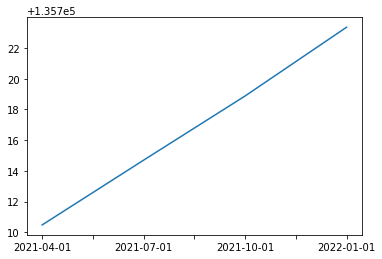

In [329]:
predict_asset_gdp["Portfolio"].plot()